## Starting code

```python
# Improting Image class from PIL module  
from PIL import Image  
  
# Opens a image in RGB mode  
im = Image.open(r"C:\Users\System-Pc\Desktop\ybear.jpg")  
  
# Size of the image in pixels (size of orginal image)  
# (This is not mandatory)  
width, height = im.size  
  
# Setting the points for cropped image  
left = 4
top = height / 5
right = 154
bottom = 3 * height / 5
  
# Cropped image of above dimension  
# (It will not change orginal image)  
im1 = im.crop((left, top, right, bottom)) 
newsize = (300, 300) 
im1 = im1.resize(newsize) 
# Shows the image in image viewer  
im1.show()  
```

In [1]:
from PIL import Image

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

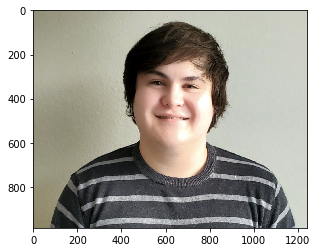

In [2]:
im = Image.open(r"./../assets/img/adam1.JPG")
imshow(im);

In [3]:
width, height = im.size
width, height

(1243, 986)

In [4]:
center = width/2, height/2
smallest = min([width, height])

center, smallest

((621.5, 493.0), 986)

In [5]:
desired_height, desired_width = 1000, 667
hw_ratio = desired_width / desired_height

hw_ratio

0.667

In [6]:
offset = smallest/2

left = int(center[0] - (offset*hw_ratio))
top = int(center[1] - offset)
right = int(center[0] + (offset*hw_ratio))
bottom = int(center[1] + offset)

left, top, right, bottom

new_image = im.crop((
    left, top, right, bottom
))

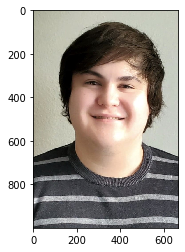

In [7]:
imshow(new_image.resize((desired_width, desired_height)))

In [8]:
imshow?

In [9]:
def resize_image(fp, desired_height=1000, desired_width=667):
    im = Image.open(fp)
    
    width, height = im.size
    
    # want to base the cropped size off the smallest edge
    smallest = min([width, height])
    center = width/2, height/2

    # pct based
    hw_ratio = desired_width / desired_height
    
    # always based off the center
    offset = smallest/2

    left = int(center[0] - (offset*hw_ratio))
    top = int(center[1] - offset)
    right = int(center[0] + (offset*hw_ratio))
    bottom = int(center[1] + offset)
    
    # crop, then resize. Cropped ratio is based on the resize ratio
    return im.crop((
        left, top, right, bottom
    ))

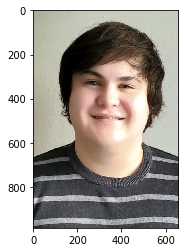

In [10]:
imshow(resize_image(r"./../assets/img/adam1.JPG"))

In [11]:
import os

images = os.listdir("./../assets/img")

In [12]:
images[0]

'david1.jpg'

In [13]:
from math import floor

# we want 3 pictures per row
floor(len(images) / 3)

11

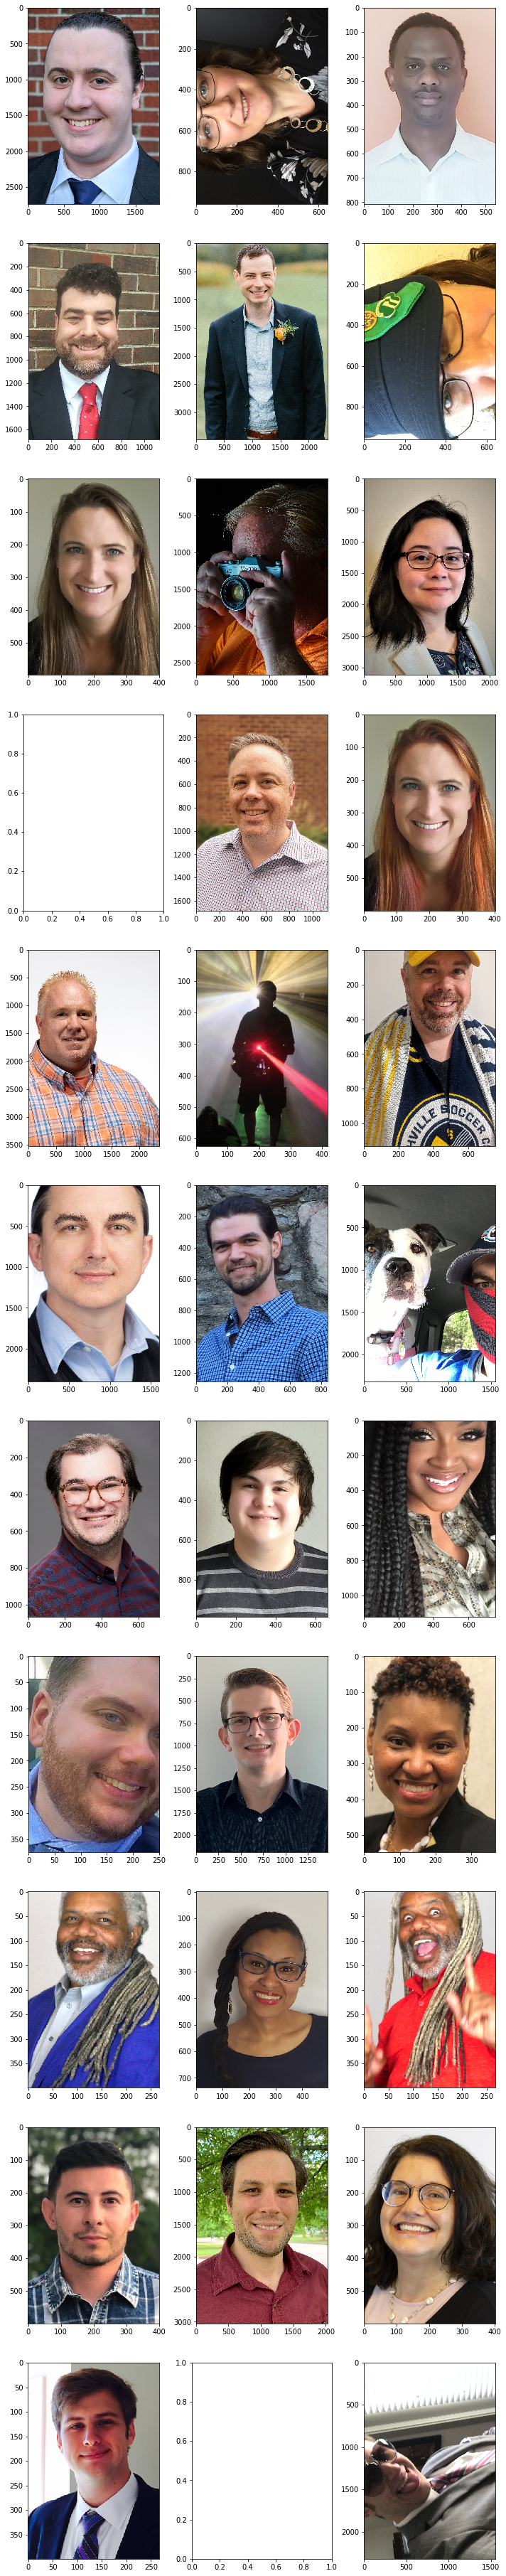

In [14]:
images = os.listdir("./../assets/img")

f, axes = plt.subplots(
    nrows=floor(len(images) / 3),
    ncols=3,
    figsize=(12, 6*floor(len(images) / 3))
)

for row in axes:
    for ax in row:
        try:
            img_name = images.pop()
            
        except IndexError:
            break
        
        else:
            if os.path.isdir(f"./../assets/img/{img_name}"):
                continue
                
            image = resize_image(
                f"./../assets/img/{img_name}",
                desired_height=400,
                desired_width=int(400*.67)
            )
            
            ax.imshow(image)

In [15]:
from resize_image import resize_images

In [16]:
resize_images("./../assets/img")

Resizing david1.jpg
Resizing tyler2.JPG
Resizing tyler1.jpg
Resizing ann1.jpg
Resizing matthew1.jpg
Resizing yasin1.JPG
Resizing landry2.jpg
Resizing brandes2.jpg
Resizing landry1.jpg
Resizing brandes1.PNG
Resizing steven1.jpeg
Resizing patrick1.jpg
Resizing lilly1.jpeg
Resizing adam1.JPG
Resizing kristian1.png
Resizing grady2.jpg
Resizing william1.JPG
Resizing grady1.jpg
Resizing brant2.jpg
Resizing david2.jpeg
Resizing tracy1.jpg
Resizing erin2.jpg
Resizing brant1.jpg
Resizing christina1.jpg
Resizing tracy2.jpg
Resizing erin1.jpg
Resizing elissa2.jpg
Resizing seibert1.jpg
Resizing justin1.jpg
Resizing fitsum1.jpg
Resizing elissa1.jpg
Resizing alan1.jpg


In [17]:
# now.. Create all the "Funny" pics if they didn't include them!
resized_images = os.listdir("./../assets/img/resized/")

In [18]:
import re

ptrn = re.compile(r'(?P<name>.*)\d')

In [19]:
from collections import defaultdict


student_images = defaultdict(list)

for fp in resized_images:
    m = ptrn.match(fp)
    student_images[m.group('name')].append(fp)

In [20]:
student_images

defaultdict(list,
            {'tyler': ['tyler2.jpeg', 'tyler1.jpeg'],
             'grady': ['grady1.jpeg', 'grady2.jpeg'],
             'landry': ['landry1.jpeg', 'landry2.jpeg'],
             'brant': ['brant1.jpeg', 'brant2.jpeg'],
             'tracy': ['tracy2.jpeg', 'tracy1.jpeg'],
             'adam': ['adam1.jpeg', 'adam2.jpeg'],
             'matthew': ['matthew1.jpeg', 'matthew2.jpeg'],
             'christina': ['christina2.jpeg', 'christina1.jpeg'],
             'alan': ['alan1.jpeg', 'alan2.jpeg'],
             'ann': ['ann2.jpeg', 'ann1.jpeg'],
             'elissa': ['elissa1.jpeg', 'elissa2.jpeg'],
             'david': ['david1.jpeg', 'david2.jpeg'],
             'kristian': ['kristian2.jpeg', 'kristian1.jpeg'],
             'seibert': ['seibert1.jpeg', 'seibert2.jpeg'],
             'justin': ['justin2.jpeg', 'justin1.jpeg'],
             'brandes': ['brandes1.jpeg', 'brandes2.jpeg'],
             'steven': ['steven1.jpeg', 'steven2.jpeg'],
             'lilly': ['l

In [21]:
from shutil import copyfile


for student, files in student_images.items():
    if len(files) == 1:
        src_filename = files[0]
        copyfile(
            f"./../assets/img/resized/{src_filename}",
            f"./../assets/img/resized/{student}2.jpeg",
        )